In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv('final_test.csv')

**Exploratory Data Analysis**

In [3]:
data.head()

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M


In [4]:
data.shape

(119734, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119734 entries, 0 to 119733
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   weight  119734 non-null  int64  
 1   age     119477 non-null  float64
 2   height  119404 non-null  float64
 3   size    119734 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ MB


In [6]:
#checking for missing values
data.isna().sum()

weight      0
age       257
height    330
size        0
dtype: int64

From the output we can see that columns age and height have missing values.   
The values have to filled and we are going to fill them with the mean

In [7]:
# Fill missing values for specific columns
data["age"] = data["age"].fillna(data["age"].mean())
data["height"] = data["height"].fillna(data["height"].mean())

In [8]:
data.isna().sum()

weight    0
age       0
height    0
size      0
dtype: int64

In [9]:
data['size'].unique()

array(['XL', 'L', 'M', 'S', 'XXS', 'XXXL', 'XXL'], dtype=object)

In [10]:
data.describe()

,weight,age,height
count,119734.000000,119734.000000,119734.000000
mean,61.756811,34.027311,165.805794
std,9.944863,8.140696,6.728360
min,22.000000,0.000000,137.160000
25%,55.000000,29.000000,160.020000
50%,61.000000,32.000000,165.100000
75%,67.000000,37.000000,170.180000
max,136.000000,117.000000,193.040000


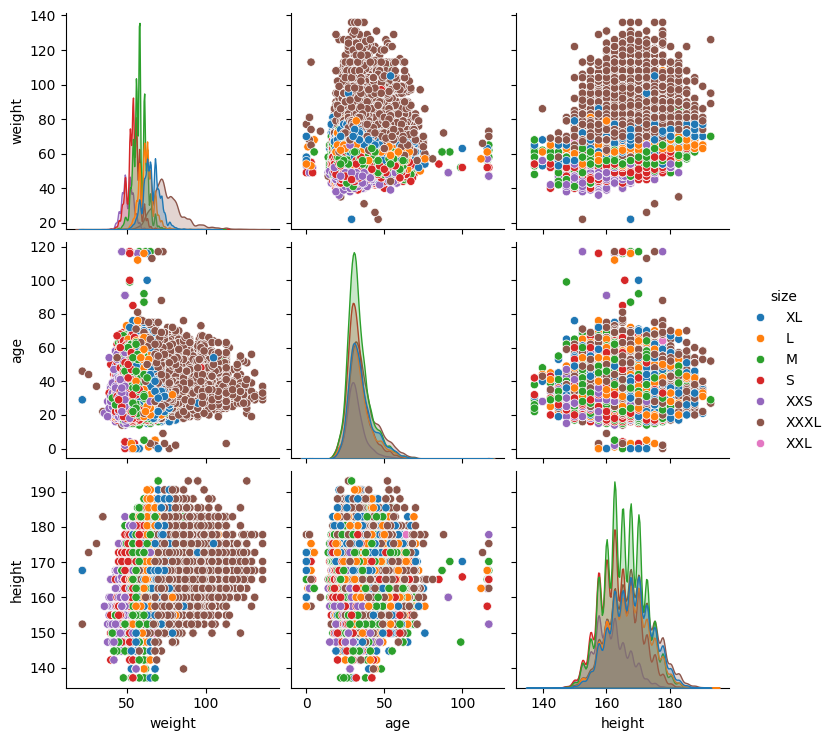

In [11]:
#vizualizations

#pairplot
plt
sns.pairplot(data, hue='size')  # Color points by 'size'
plt.show()

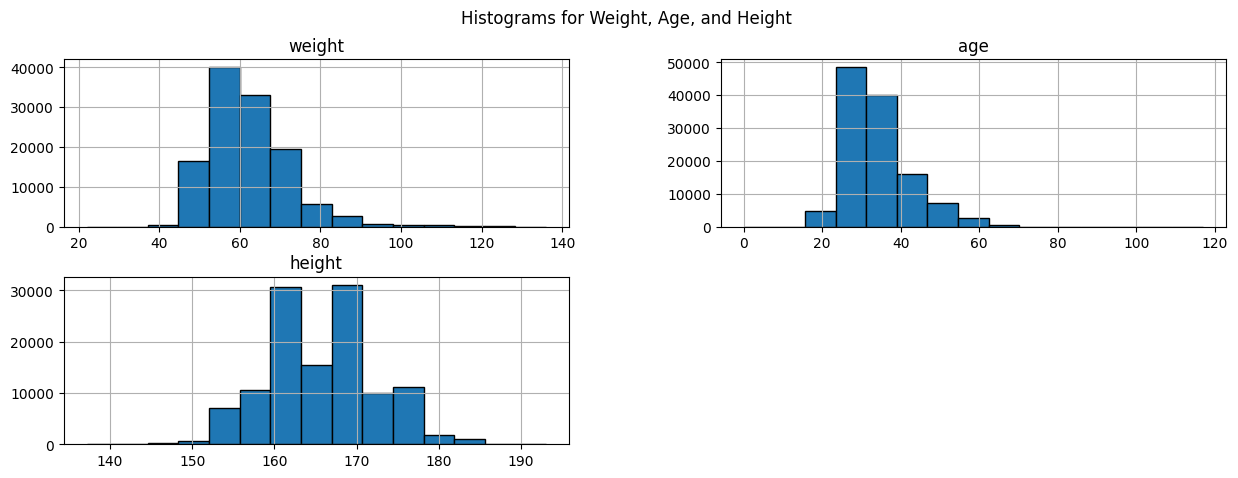

In [12]:
# Histograms for weight, age, and height
data[['weight', 'age', 'height']].hist(bins=15, figsize=(15, 5), edgecolor='black')
plt.suptitle('Histograms for Weight, Age, and Height')
plt.show()

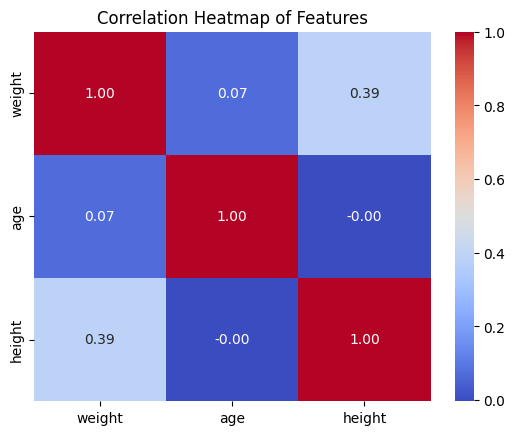

In [13]:
# Heatmap of correlations
correlation_matrix = data[['weight', 'age', 'height']].corr()  # Calculate correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the target variable 'size'
label_encoder = LabelEncoder()
data['size_encoded'] = label_encoder.fit_transform(data['size'])

# Print label mapping
size_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Size Mapping:", size_mapping)


Size Mapping: {'L': np.int64(0), 'M': np.int64(1), 'S': np.int64(2), 'XL': np.int64(3), 'XXL': np.int64(4), 'XXS': np.int64(5), 'XXXL': np.int64(6)}


**Feature Scaling and Train-Test Split**

In [23]:
import sys
!{sys.executable} -m pip install scikit-plot

  Using cached scikit_plot-0.3.7-py3-none-any.whl.metadata (7.1 kB)
Using cached scikit_plot-0.3.7-py3-none-any.whl (33 kB)


In [39]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
#import scikitplot as skplt

In [43]:
#define features (X) and target (y)
X = data[['weight','age','height']]
y = data['size_encoded']

In [44]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Train and Evaluate Models**  
(a) Logistic Regression

In [46]:
#train a logistic regression model
lr_model = LogisticRegression(max_iter=500)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Logistic Regression Accuracy: 0.5131331690817221
Confusion Matrix (scikit-learn):
 [[ 299 1862  114 1127    0    5  182]
 [ 216 4043 1032  473    0   74   52]
 [  20 1626 2207   46    0  477   16]
 [ 229  958   50 1691    0    4  810]
 [   2    2    0    6    0    0    5]
 [   1  188 1063    9    0  748    2]
 [  44  156   12  789    0    7 3300]]


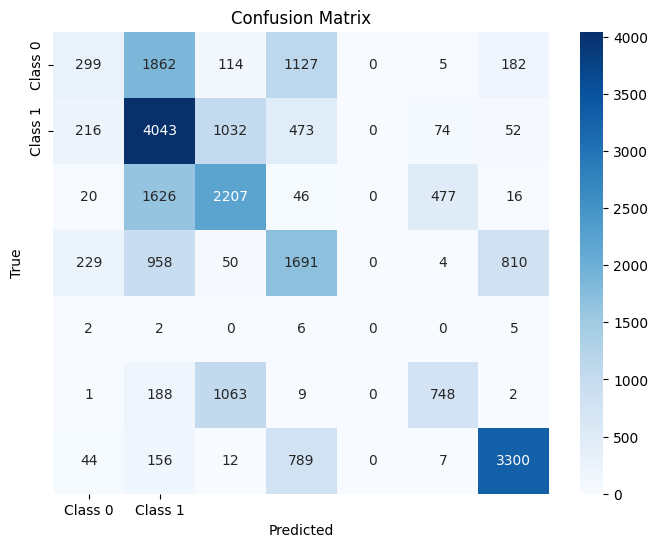

In [49]:
#predict on test set 
y_pred_lr = lr_model.predict(X_test)

#compute accuracy
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print('Logistic Regression Accuracy:', lr_accuracy)

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix (scikit-learn):\n", cm_lr)


# Plot using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()